In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving diamonds.csv to diamonds (2).csv


In [ ]:
#Machine Learning Algorithm(Support Vector Machine,Random forest, XGBoost Classifier, KNN)
#Deep learning -> Artificial Nueral Networks(ANN)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os

In [ ]:
df=pd.read_csv('diamonds.csv')

In [ ]:
df.keys()

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
df=df.iloc[:, 1:10]

In [ ]:
#Data Visualization, Explotary Analysis & Data Pre-processing

In [ ]:
df.head(n=10)

,carat,cut,color,clarity,depth,table,price,x,y
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05


In [ ]:
df.describe()

,carat,depth,table,price,x,y
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 3.7+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [ ]:
# Encoding the variable
fit = df.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
df=df.apply(lambda x: d[x.name].transform(x))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y
0,3,2,1,3,83,30,0,20,26
1,1,3,1,2,66,90,0,14,12
2,3,1,1,4,37,115,1,30,35
3,9,3,5,5,92,60,2,45,51
4,11,1,6,3,101,60,3,59,63


In [ ]:
cut=df['cut']

In [ ]:
df=df.drop("cut",axis=1)

In [ ]:
df.head()

,carat,color,clarity,depth,table,price,x,y
0,3,1,3,83,30,0,20,26
1,1,1,2,66,90,0,14,12
2,3,1,4,37,115,1,30,35
3,9,5,5,92,60,2,45,51
4,11,6,3,101,60,3,59,63


In [ ]:
df['cut']=cut

In [ ]:
df.head()

,carat,color,clarity,depth,table,price,x,y,cut
0,3,1,3,83,30,0,20,26,2
1,1,1,2,66,90,0,14,12,3
2,3,1,4,37,115,1,30,35,1
3,9,5,5,92,60,2,45,51,3
4,11,6,3,101,60,3,59,63,1


In [ ]:
df.describe()

,carat,color,clarity,depth,table,price,x,y,cut
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,59.757008,2.594197,3.835150,85.497386,54.369596,3089.756785,198.144828,201.341676,2.553003
std,47.209045,1.701105,1.724591,14.201771,21.521437,3007.379097,111.895472,111.098948,1.027708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,2.000000,78.000000,40.000000,605.000000,96.000000,100.000000,2.000000
50%,50.000000,3.000000,4.000000,86.000000,50.000000,1955.000000,195.000000,199.000000,2.000000
75%,84.000000,4.000000,5.000000,93.000000,70.000000,4720.250000,279.000000,282.000000,3.000000
max,272.000000,6.000000,7.000000,183.000000,126.000000,11601.000000,553.000000,551.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   carat    53940 non-null  int64
 1   color    53940 non-null  int64
 2   clarity  53940 non-null  int64
 3   depth    53940 non-null  int64
 4   table    53940 non-null  int64
 5   price    53940 non-null  int64
 6   x        53940 non-null  int64
 7   y        53940 non-null  int64
 8   cut      53940 non-null  int64
dtypes: int64(9)
memory usage: 3.7 MB


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


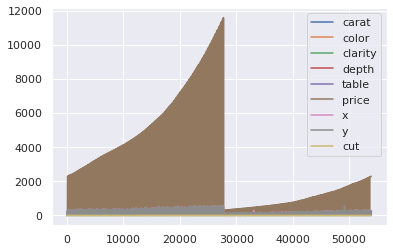

In [ ]:
import seaborn; seaborn.set()
df.plot();

In [ ]:
df.corr()

,carat,color,clarity,depth,table,price,x,y,cut
carat,1.000000,0.291612,-0.213777,0.027903,0.185618,0.940714,0.978121,0.977152,0.017904
color,0.291612,1.000000,-0.027795,0.048133,0.027293,0.178400,0.270640,0.270338,0.000304
clarity,-0.213777,-0.027795,1.000000,-0.053271,-0.089686,-0.083672,-0.225832,-0.222887,0.028235
depth,0.027903,0.048133,-0.053271,1.000000,-0.296973,-0.005887,-0.025169,-0.028353,-0.196270
table,0.185618,0.027293,-0.089686,-0.296973,1.000000,0.141948,0.199109,0.193129,0.174354
price,0.940714,0.178400,-0.083672,-0.005887,0.141948,1.000000,0.924632,0.926046,0.039893
x,0.978121,0.270640,-0.225832,-0.025169,0.199109,0.924632,1.000000,0.998463,0.022290
y,0.977152,0.270338,-0.222887,-0.028353,0.193129,0.926046,0.998463,1.000000,0.028093
cut,0.017904,0.000304,0.028235,-0.196270,0.174354,0.039893,0.022290,0.028093,1.000000


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

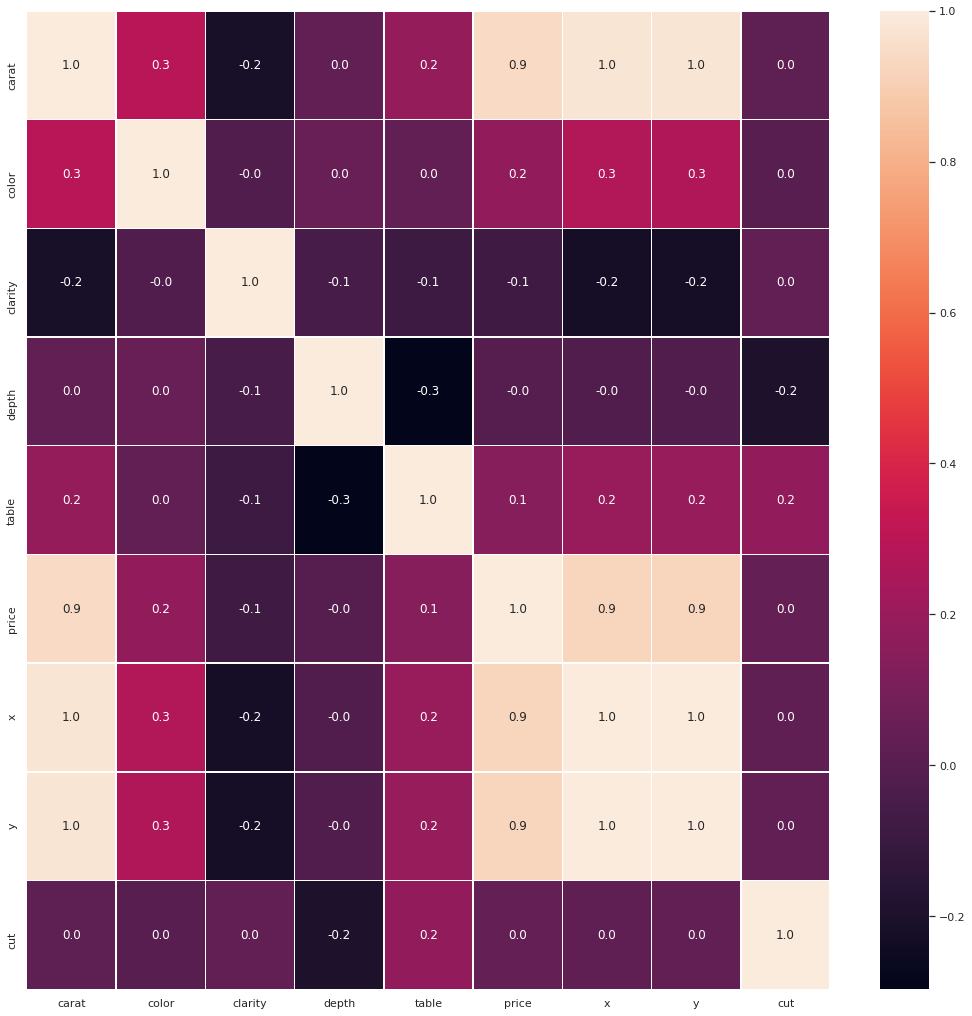

In [ ]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True, linewidths=.5,fmt='.1f',ax=ax)

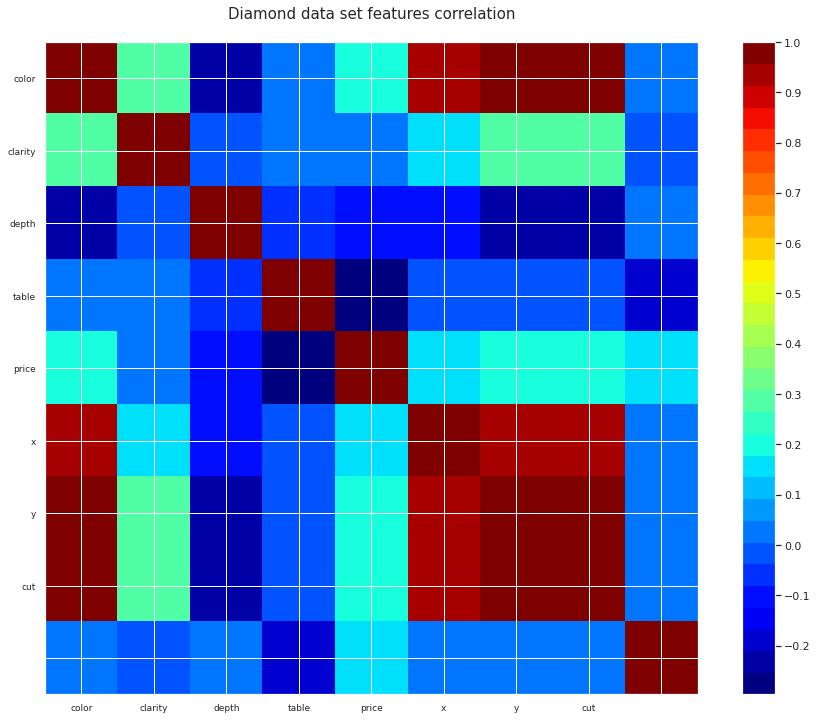

In [ ]:
def correlation_matrix(d):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Diamond data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()
correlation_matrix(df)


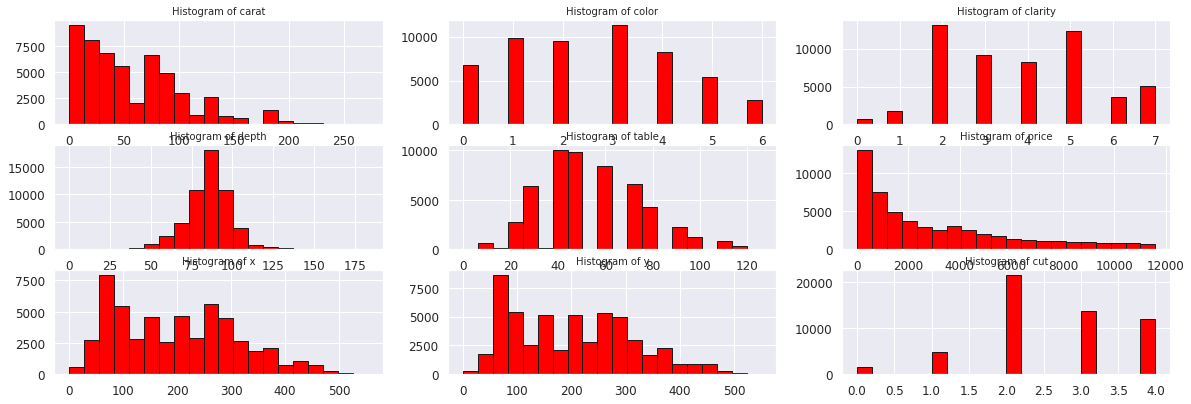

In [ ]:
i=1
plt.figure(figsize=(20,18))
for c in df.describe().columns[:]:
    plt.subplot(8,3,i)
    plt.title(f"Histogram of {c}",fontsize=10)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(df[c],bins=20,color='red',edgecolor='k')
    i+=1
plt.show()

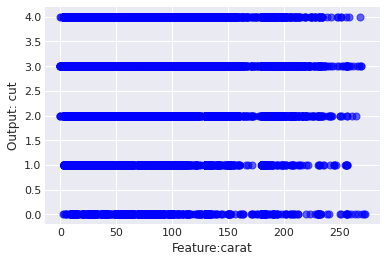

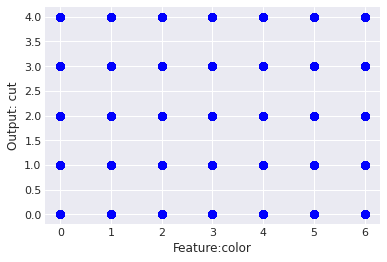

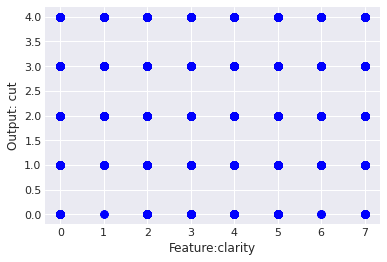

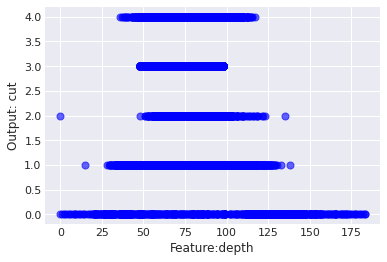

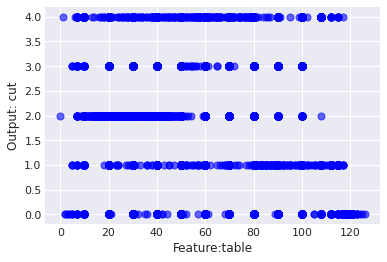

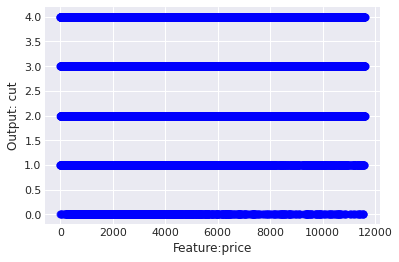

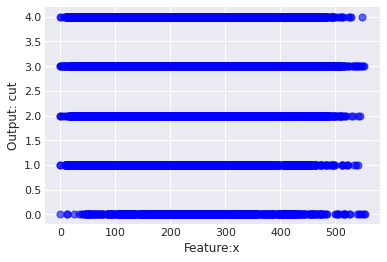

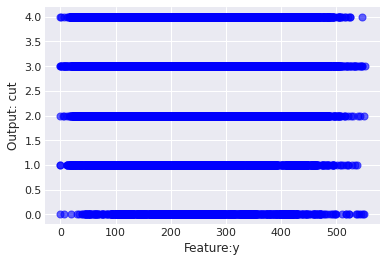

In [ ]:
with plt.style.context(('seaborn-dark')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: cut',fontsize=12)
        plt.scatter(df[col],df['cut'],c='blue',s=50,alpha=0.6)

In [ ]:
df.apply(lambda x: sum(x.isnull()),axis=0)

carat      0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
cut        0
dtype: int64

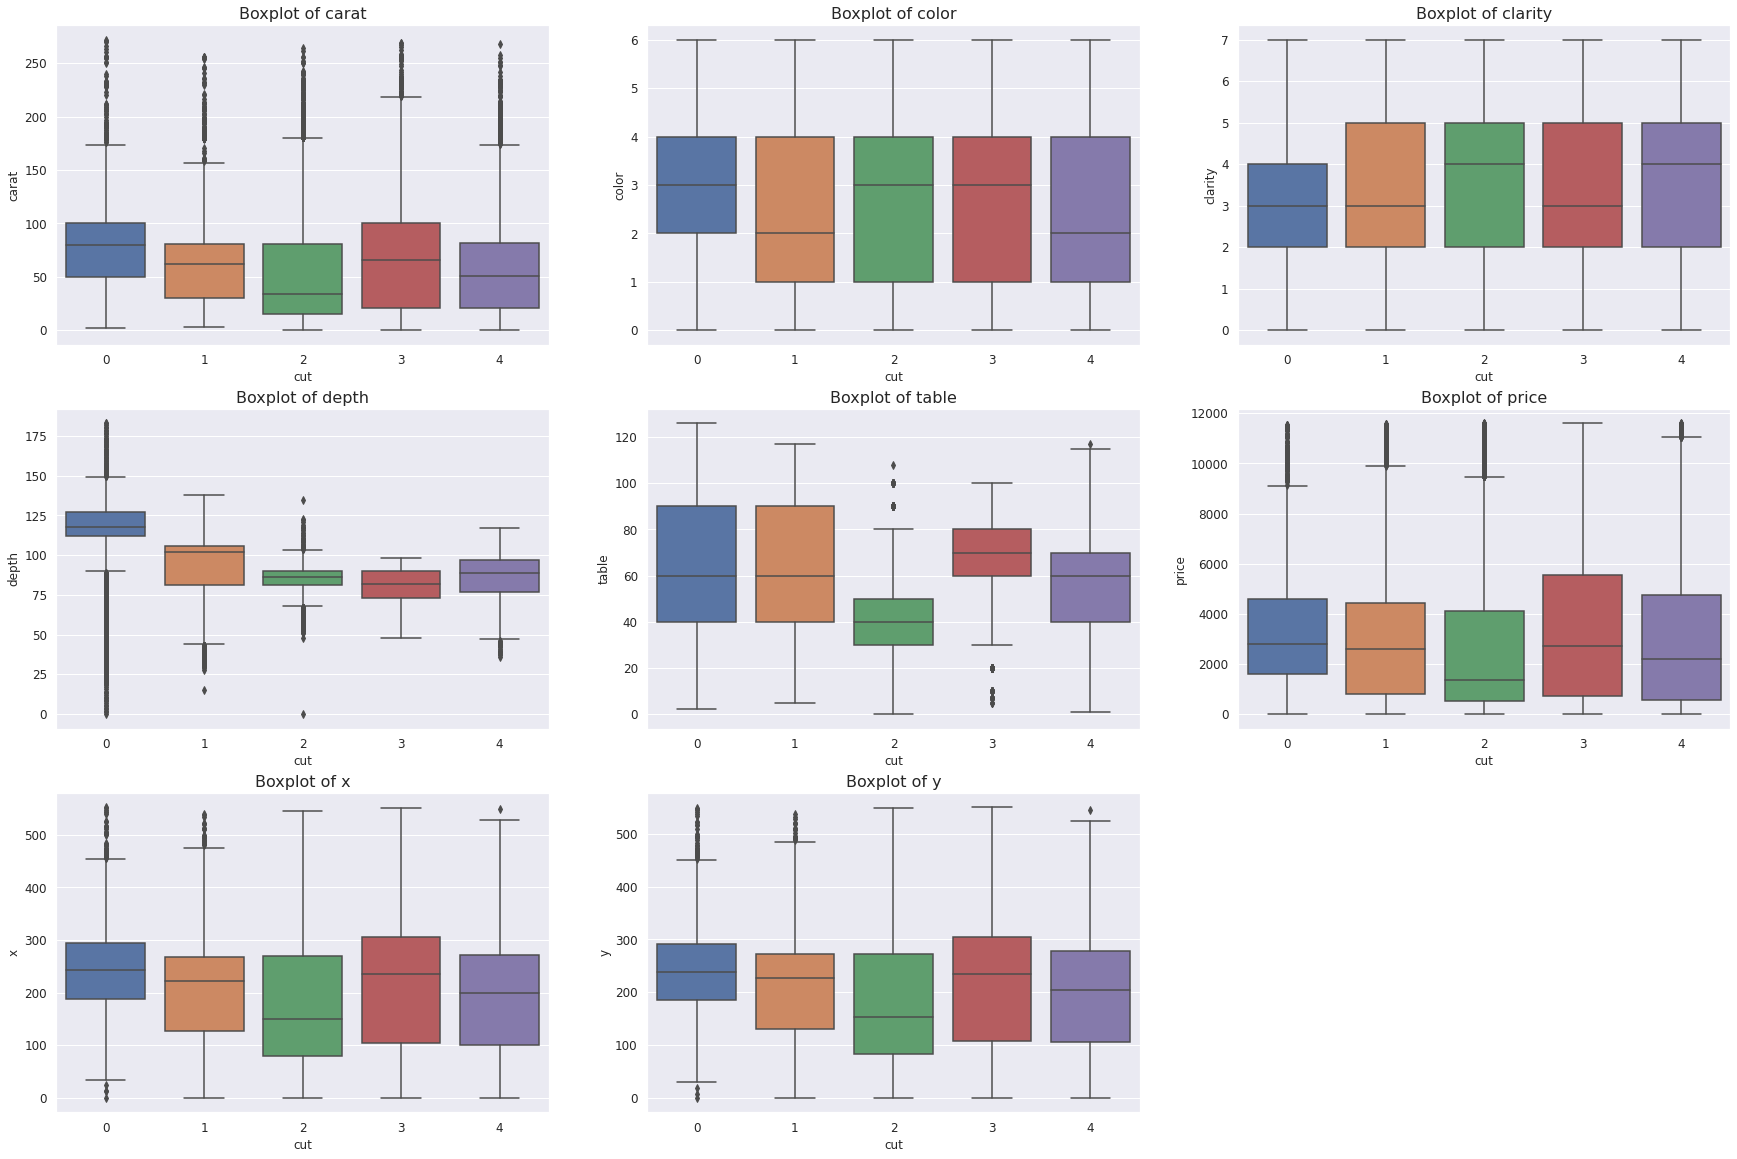

In [ ]:
i=1
plt.figure(figsize=(30,20))
for c in df.columns[:-1]:
    plt.subplot(3,3,i)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['cut'])
    i+=1
plt.show()

In [ ]:
X_data=df.drop(['cut'],axis=1)
y_data=df['cut']



In [ ]:
X_data.shape

(53940, 8)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.33, random_state=42)

In [ ]:
#Applied Algorithm or Method into Data  without scaling (standard scaler or min max)

In [ ]:
dims = X_train.shape[1]
print(dims, 'dims')

8 dims


In [ ]:
print(y_train)

241      0
17398    2
36608    4
44731    2
18104    2
        ..
11284    4
44732    2
38158    4
860      3
15795    3
Name: cut, Length: 36139, dtype: int64


In [ ]:
#For Support vector Algorithm
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[   0    0  314  218    0]
 [   0    0 1091  552    0]
 [   0    0 6507  622    0]
 [   0    0 3014 1569    0]
 [   0    0 3003  911    0]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       532
           1       0.00      0.00      0.00      1643
           2       0.47      0.91      0.62      7129
           3       0.41      0.34      0.37      4583
           4       0.00      0.00      0.00      3914

    accuracy                           0.45     17801
   macro avg       0.17      0.25      0.20     17801
weighted avg       0.29      0.45      0.34     17801



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Using XGBboost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.88%


In [ ]:
#Models performance Analysis with scaling(standard Scaler)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
list_models=[]
list_scores=[]
x_train=sc.fit_transform(X_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds=knn.predict(sc.transform(X_test))
    scores=accuracy_score(y_test,preds)
    list_1.append(scores)

In [ ]:
list_scores.append(max(list_1))
list_models.append('KNeighbors Classifier')

In [ ]:
print(max(list_1))

0.683276220437054


In [ ]:
#2nd method for Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(sc.transform(X_test))
score_2=accuracy_score(y_test,pred_2)
list_models.append('Randomforest Classifier')
list_scores.append(score_2)

In [ ]:
score_2

0.7811358912420651

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_3=svm.predict(sc.transform(X_test))
score_3=accuracy_score(y_test,pred_3)
list_scores.append(score_3)
list_models.append('Support vector machines')

In [ ]:
score_3

0.7427672602662772

In [ ]:
#2nd method for XGB

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred_4=xgb.predict(sc.transform(X_test))
score_4=accuracy_score(y_test,pred_4)
list_models.append('XGboost')
list_scores.append(score_4)

In [ ]:
score_4

0.7488343351497107

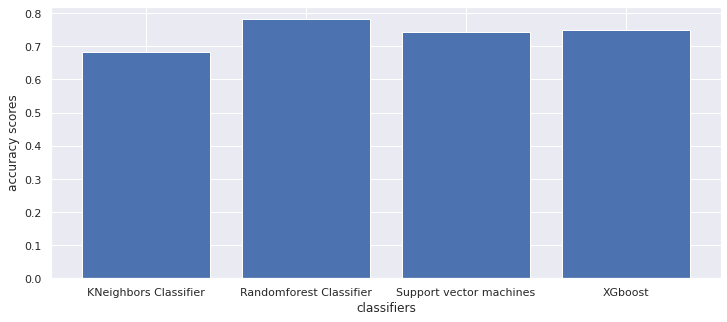

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(list_models,list_scores)
plt.xlabel('classifiers')
plt.ylabel('accuracy scores')
plt.show()

In [ ]:
#Artificial Neural Networks

In [ ]:
import keras
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X = df.iloc[:, 1:8].values
y = df.iloc[:, 8].values
X

array([[   1,    3,   83, ...,    0,   20,   26],
       [   1,    2,   66, ...,    0,   14,   12],
       [   1,    4,   37, ...,    1,   30,   35],
       ...,
       [   0,    2,   96, ..., 2300,  191,  196],
       [   4,    3,   78, ..., 2300,  240,  240],
       [   0,    3,   90, ..., 2300,  208,  215]])

In [ ]:
y

array([2, 3, 1, ..., 4, 3, 2])

In [ ]:
#Deep Learning Baseline Model-Using Buildin Function

In [ ]:
def create_baseline():
# create model
    model = Sequential()
    model.add(Dense(100, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=1)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Epoch 1/100
7192/7192 [==============================] - 9s 1ms/step - loss: 1.2668 - accuracy: 0.4925
Epoch 2/100
7192/7192 [==============================] - 9s 1ms/step - loss: 1.1488 - accuracy: 0.5540
Epoch 3/100
7192/7192 [==============================] - 9s 1ms/step - loss: 1.1040 - accuracy: 0.5705
Epoch 4/100
7192/7192 [==============================] - 9s 1ms/step - loss: 1.0402 - accuracy: 0.5915
Epoch 5/100
7192/7192 [==============================] - 9s 1ms/step - loss: 0.9837 - accuracy: 0.6100
Epoch 6/100
7192/7192 [==============================] - 9s 1ms/step - loss: 0.9495 - accuracy: 0.6260
Epoch 7/100
7192/7192 [==============================] - 9s 1ms/step - loss: 0.9356 - accuracy: 0.6300
Epoch 8/100
7192/7192 [==============================] - 9s 1ms/step - loss: 0.9231 - accuracy: 0.6381
Epoch 9/100
7192/7192 [==============================] - 9s 1ms/step - loss: 0.9226 - accuracy: 0.6411
Epoch 10/100
7192/7192 [==============================] - 9s 1ms/step - l